**SOFT DEADLINE:** `20.03.2022 23:59 msk` 

# [5 points] Part 1. Data cleaning

The task is to clear the text data of the crawled web-pages from different sites. 

It is necessary to ensure that the distribution of the 100 most frequent words includes only meaningful words in english language (not particles, conjunctions, prepositions, numbers, tags, symbols).

Determine the order of operations below and carry out the appropriate cleaning.

1. Remove non-english words
1. Remove html-tags (try to do it with regular expression, or play with beautifulsoap library)
1. Apply lemmatization / stemming
1. Remove stop-words
1. Additional processing - At your own initiative, if this helps to obtain a better distribution

#### Hints

1. To do text processing you may use nltk and re libraries
1. and / or any other libraries on your choise

#### Data reading

The dataset for this part can be downloaded here: `https://drive.google.com/file/d/1wLwo83J-ikCCZY2RAoYx8NghaSaQ-lBA/view?usp=sharing`

In [10]:
from collections import defaultdict
import re
from tqdm.notebook import tqdm

import pandas as pd

from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
import plotly.express as px

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
data = pd.read_csv('web_sites_data.csv')
data

,text
0,"<html>\n<head profile=""http://www.w3.org/2005/..."
1,"<html>\n<head profile=""http://www.w3.org/2005/..."
2,"<html>\n<head profile=""http://www.w3.org/2005/..."
3,"<html>\n<head profile=""http://www.w3.org/2005/..."
4,"<html>\n<head profile=""http://www.w3.org/2005/..."
...,...
71694,"<?xml version=""1.0"" encoding=""UTF-8""?>\n \n..."
71695,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T..."
71696,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T..."
71697,"<?xml version=""1.0"" encoding=""UTF-8""?>\n \n..."


#### Data processing

In [3]:
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def clean_webpage(html_text):
    bs = BeautifulSoup(html_text)
    text = bs.get_text()  # html document to text transformation

    text = re.sub("[^ a-zA-Z]", " ", text)  # deleting everything besides the english alphabet and whitespaces
    text = re.sub(" +", " ", text)  # merging multiple whitespaces
    text = text.lower()  # text to lowercase

    text = (word for word in text.split(" ") if word and not word in stop_words)  # removing stop_words

    text = (lemmatizer.lemmatize(token) for token in text)  # lemmatization
    return ' '.join(text)

In [4]:
data['cleaned_text'] = data.text.map(clean_webpage)

KeyboardInterrupt: 

In [7]:
cleaned_texts = data.text[:1_000].map(clean_webpage)

#### Vizualization

As a visualisation, it is necessary to construct a frequency distribution of words (the 100 most common words), sorted by frequency. 

For visualization purposes we advice you to use plotly, but you are free to choose other libraries

In [8]:
freq = defaultdict(int)
for cleaned_text in tqdm(cleaned_texts):
    for word in cleaned_text.split(' '):
        freq[word] += 1

  0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\Владислав\AppData\Local\Temp/ipykernel_15676/3908253267.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_100_words, rotation=270)


Text(0.5, 1.0, 'The most frequent words')

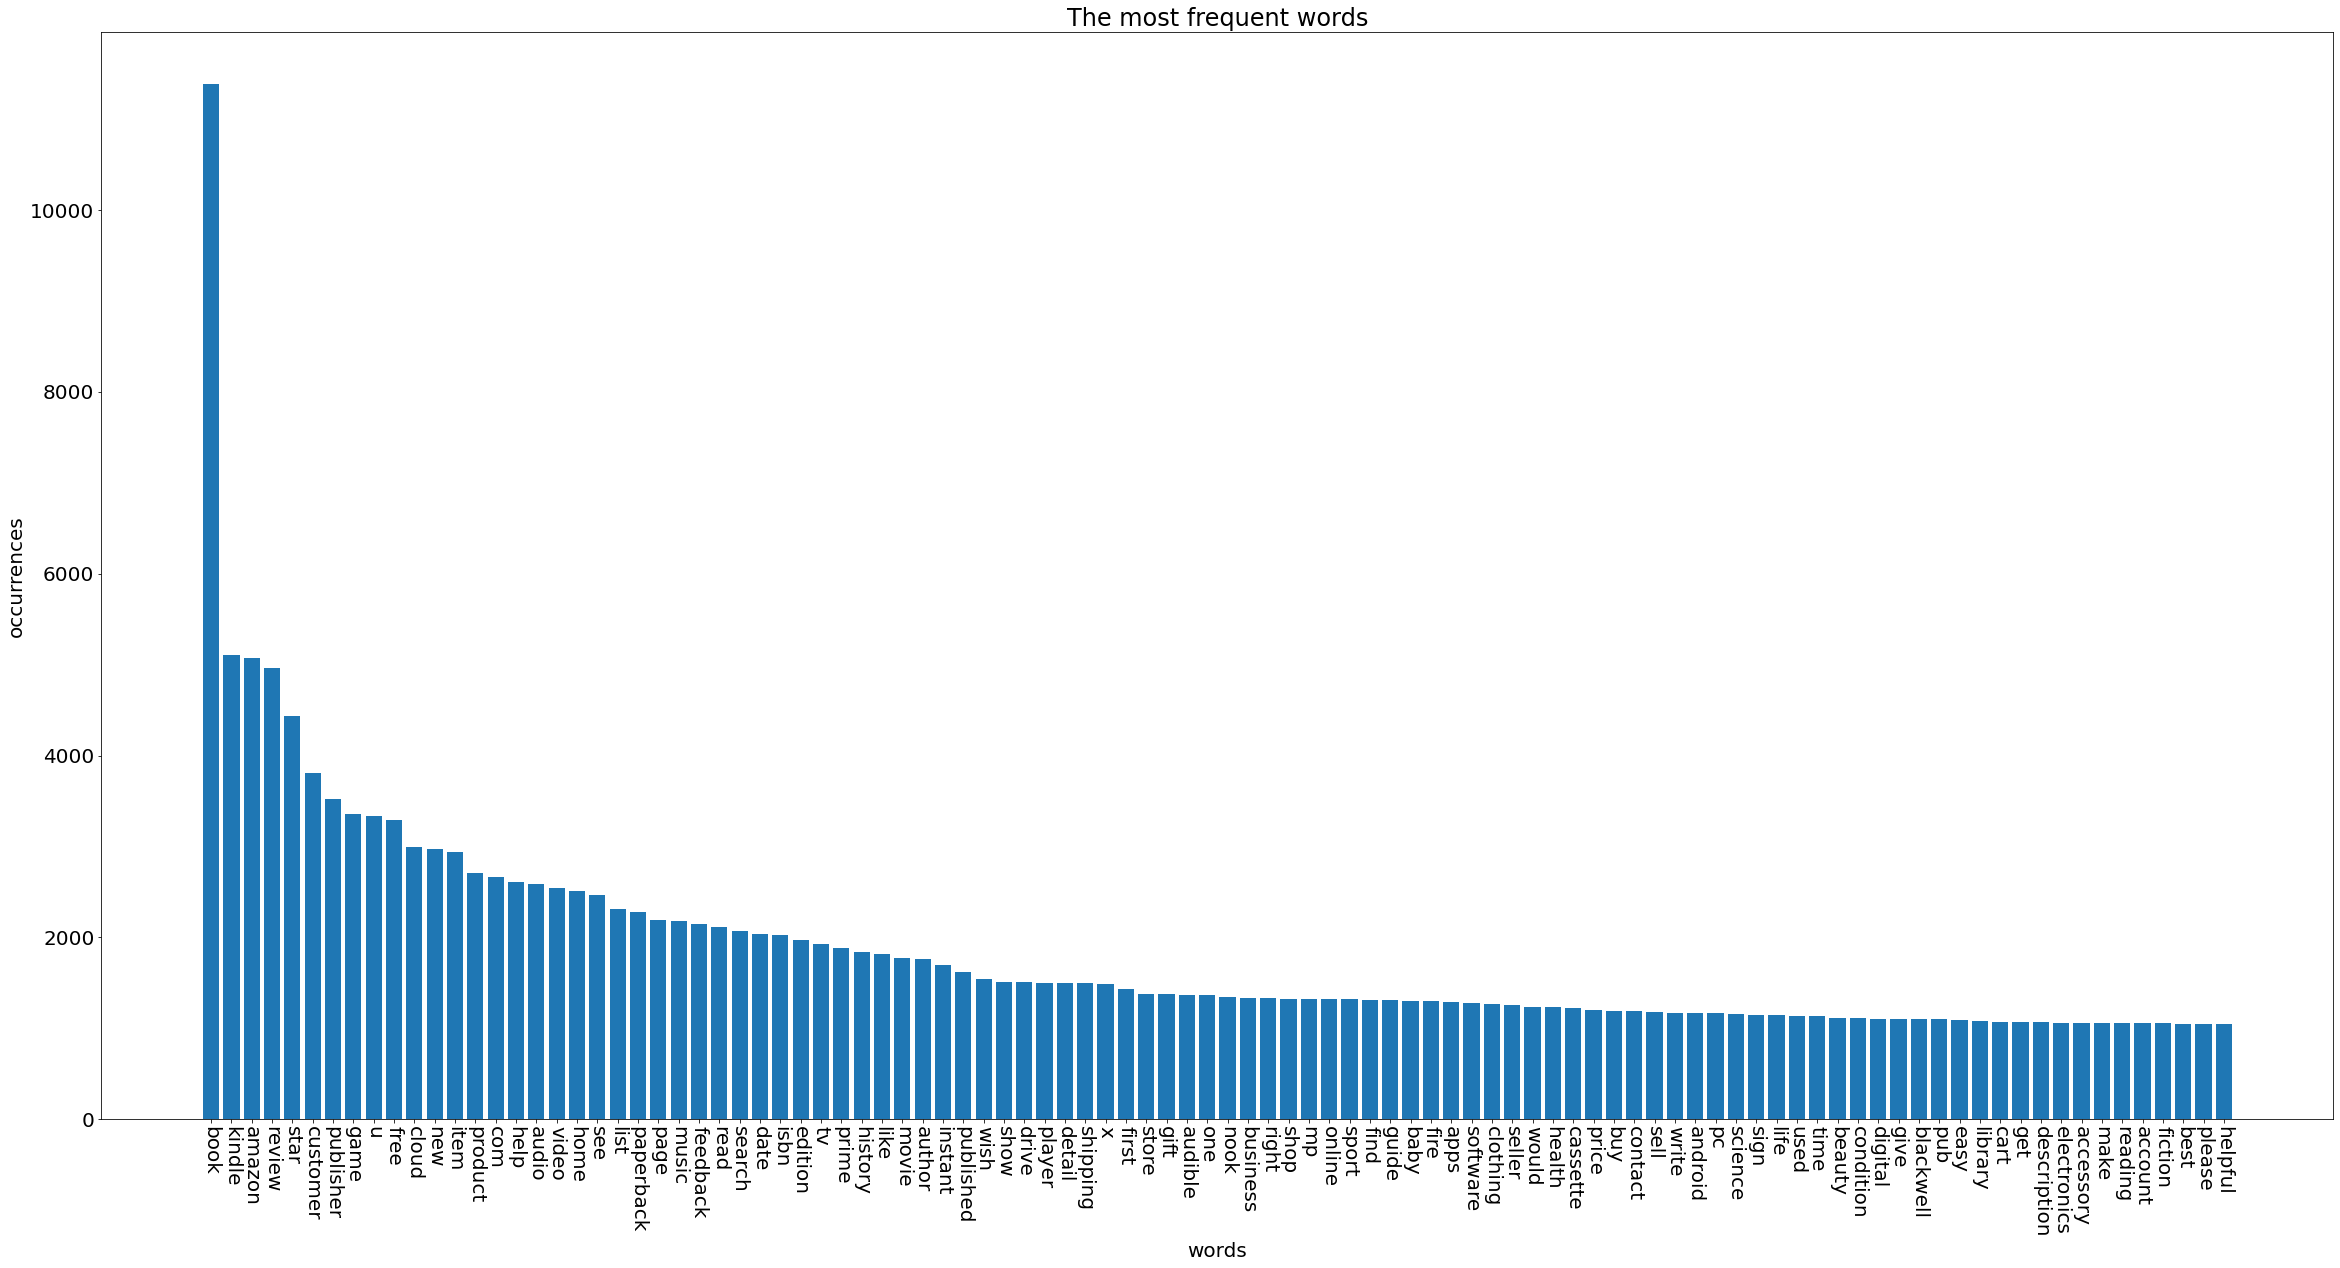

In [16]:
top_100_words = sorted(freq.keys(), key=freq.get, reverse=True)[:100]

plt.rcParams["figure.figsize"] = [40, 20]
plt.rcParams.update({'font.size': 20})
ax = plt.subplot()
ax.bar(top_100_words, [freq[word] for word in top_100_words])
ax.set_xlabel('words')
ax.set_ylabel('occurrences')
ax.set_xticklabels(top_100_words, rotation=270)
ax.set_title(f'The most frequent words')

#### Provide examples of processed text (some parts)

Is everything all right with the result of cleaning these examples? What kind of information was lost?

In [17]:
# Example of cleaned webpage text
cleaned_texts[12]

'fay weldon wicked woman fay weldon wicked woman author fay weldon title wicked woman moochable copy copy available topic literature fictionshort story published english binding hardcover page date isbn publisher harpercollins audio edition abridged amazon price wishlists bearded monalisa portugal description product description diverse collection short story amazon com review fay weldon writer understands value holding grudge forget year long vengeance heroine best known book life love devil exacted faithless husband romance writer stole even physical extreme weldon scorned wife go order remake image rival including broken bone plastic surgery worth finally succeeds destroying life horrifying conceit might seem real life weldon fictional revenge whether served hot cold tasty dish wicked woman collection short story fay weldon continues one writer crusade ensure bad people get exactly coming fay weldon story dark also savagely satirical santa claus new clothes child recently divorced f

Information about numbers, special terms (e.g. foreign terms) and additional text meaning created by markup was lost

# [10 points] Part 2. Duplicates detection. LSH

#### Libraries you can use

1. LSH - https://github.com/ekzhu/datasketch
1. LSH - https://github.com/mattilyra/LSH
1. Any other library on your choise

1. Detect duplicated text (duplicates do not imply a complete word-to-word match, but texts that may contain a paraphrase, rearrangement of words, sentences)
1. Make a plot dependency of duplicates on shingle size (with fixed minhash length) 
1. Make a plot dependency of duplicates on minhash length (with fixed shingle size)

In [18]:
from tqdm.notebook import tqdm

import pandas as pd

from datasketch import MinHash, MinHashLSH

In [19]:
data = pd.read_csv('train.csv', usecols=['id', 'question1', 'question2', 'is_duplicate'], index_col='id')
data.dropna(inplace=True)
data

,question1,question2,is_duplicate
id,,,
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...
404285,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,What is one coin?,What's this coin?,0


In [24]:
def create_shingles(doc, k):
    shingled_set = set()
    doc_length = len(doc) 
    
    for idx in range(doc_length - k + 1):
        doc_slice = doc[idx:idx + k]
        shingled_set.add(doc_slice)
        
    return shingled_set

def detect(row, shingle_size, minhash_length):
    m1 = MinHash(num_perm=minhash_length)
    m2 = MinHash(num_perm=minhash_length)
    for d in create_shingles(row.question1, shingle_size):
        m1.update(d.encode('utf8'))
    for d in create_shingles(row.question2, shingle_size):
        m2.update(d.encode('utf8'))

    lsh = MinHashLSH(num_perm=minhash_length)
    lsh.insert("m1", m1)
    return bool(lsh.query(m2))

def score(shingle_size, minhash_length):
    detect_ = lambda row: detect(row, shingle_size, minhash_length)
    return (data[:20_000].apply(detect_, axis=1)).sum()

In [26]:
print(f"Total duplicates in data: {data[:20_000].is_duplicate.sum()}")

Total duplicates in data: 7474


In [33]:
def plot_line(x, y, xlabel, ylabel, title):
    ax = plt.subplot()
    ax.plot(x, y)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

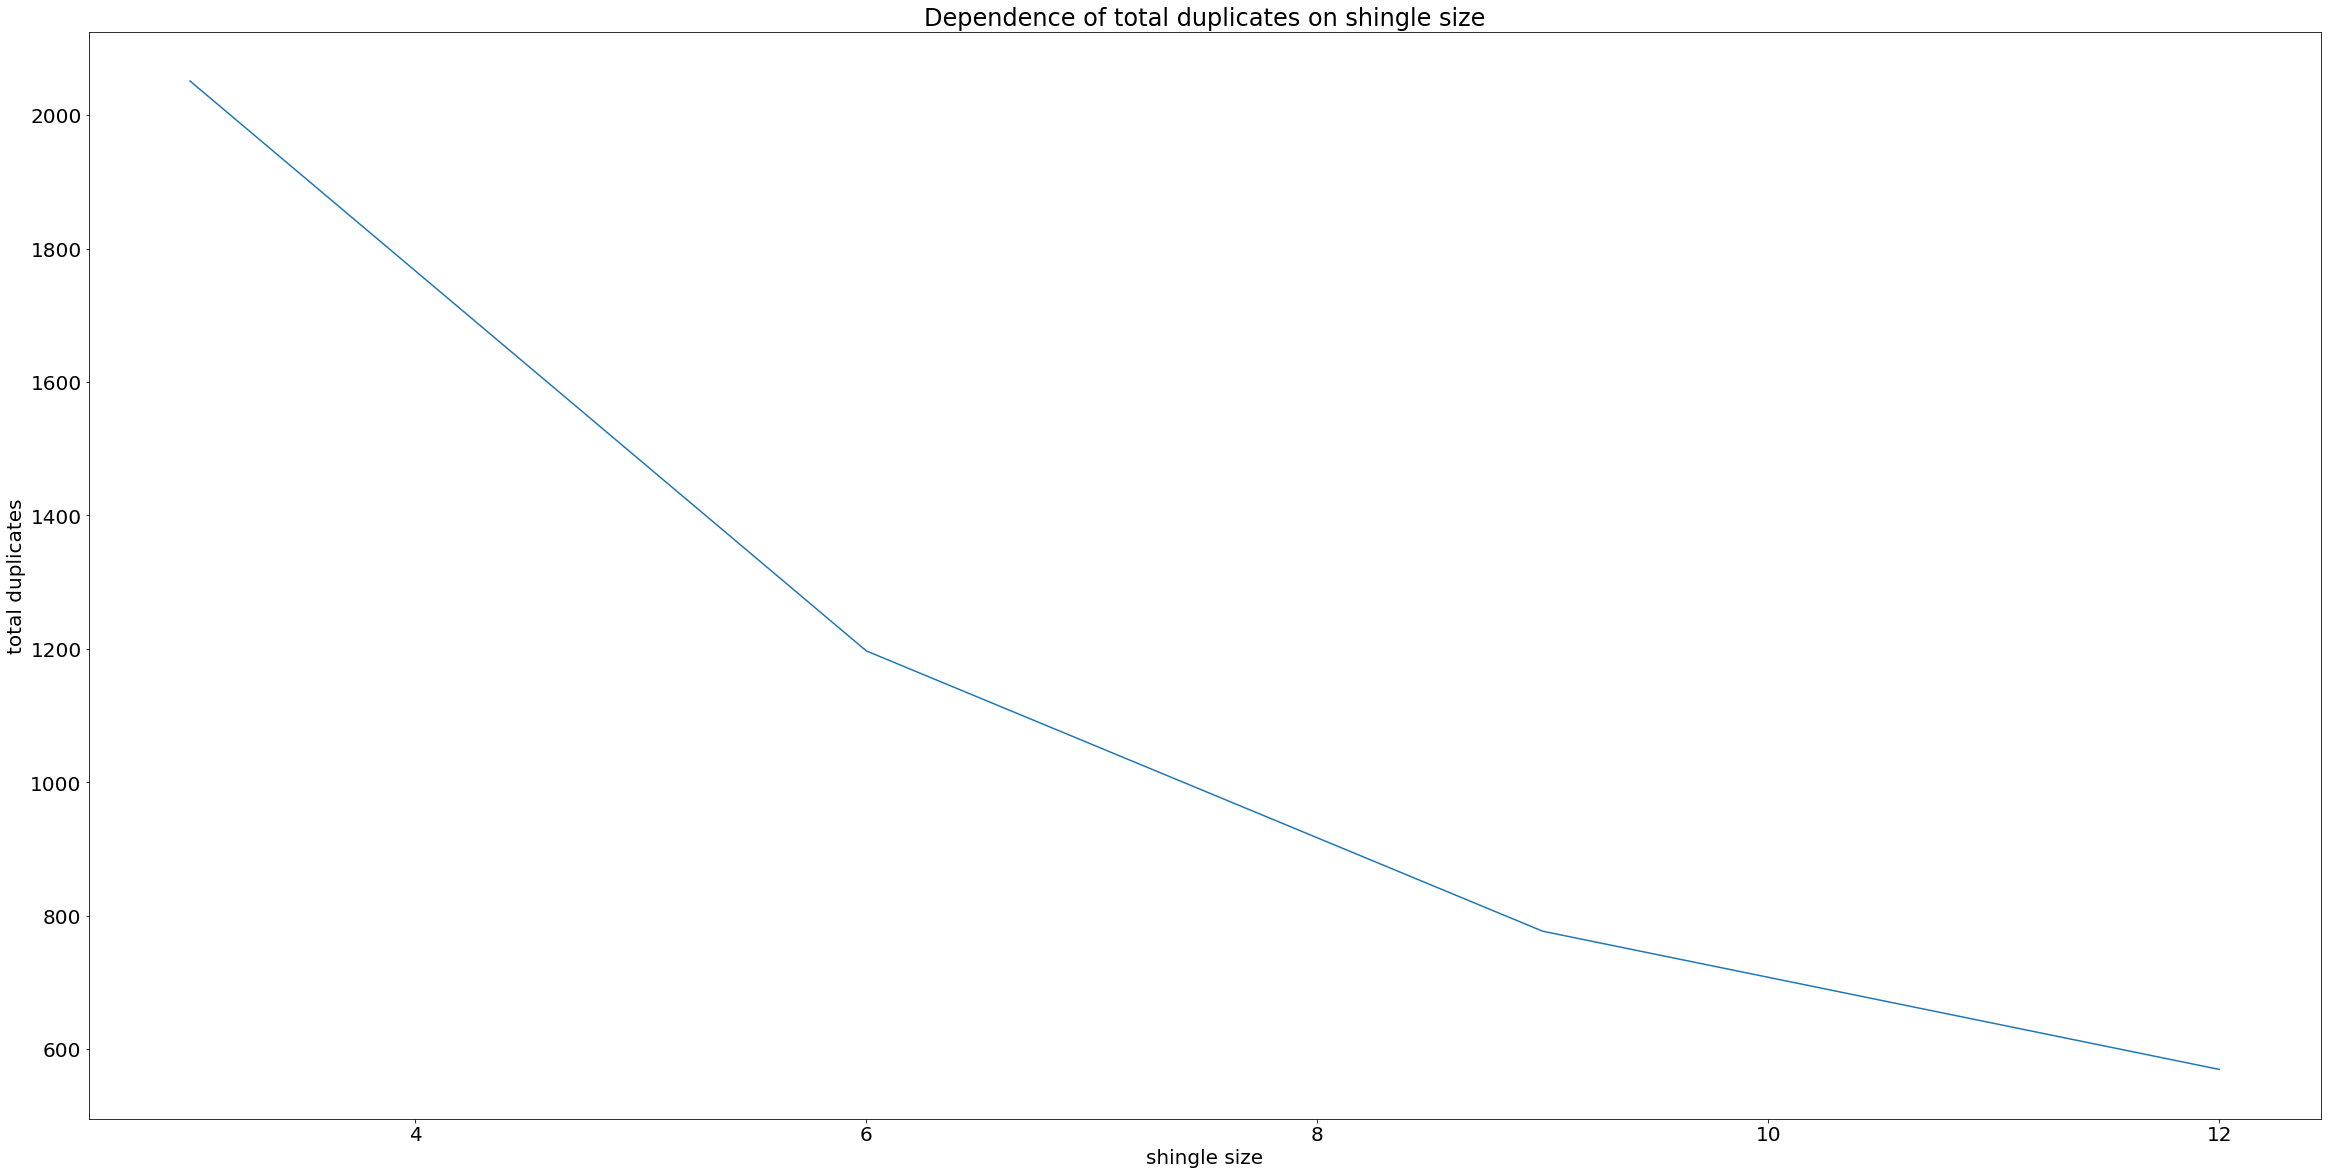

In [34]:
shingle_size_range = range(3, 13, 3)

plot_line(x=shingle_size_range, y=[score(ss, 3) for ss in shingle_size_range],\
         xlabel='shingle size', ylabel='total duplicates', title='Dependence of total duplicates on shingle size')

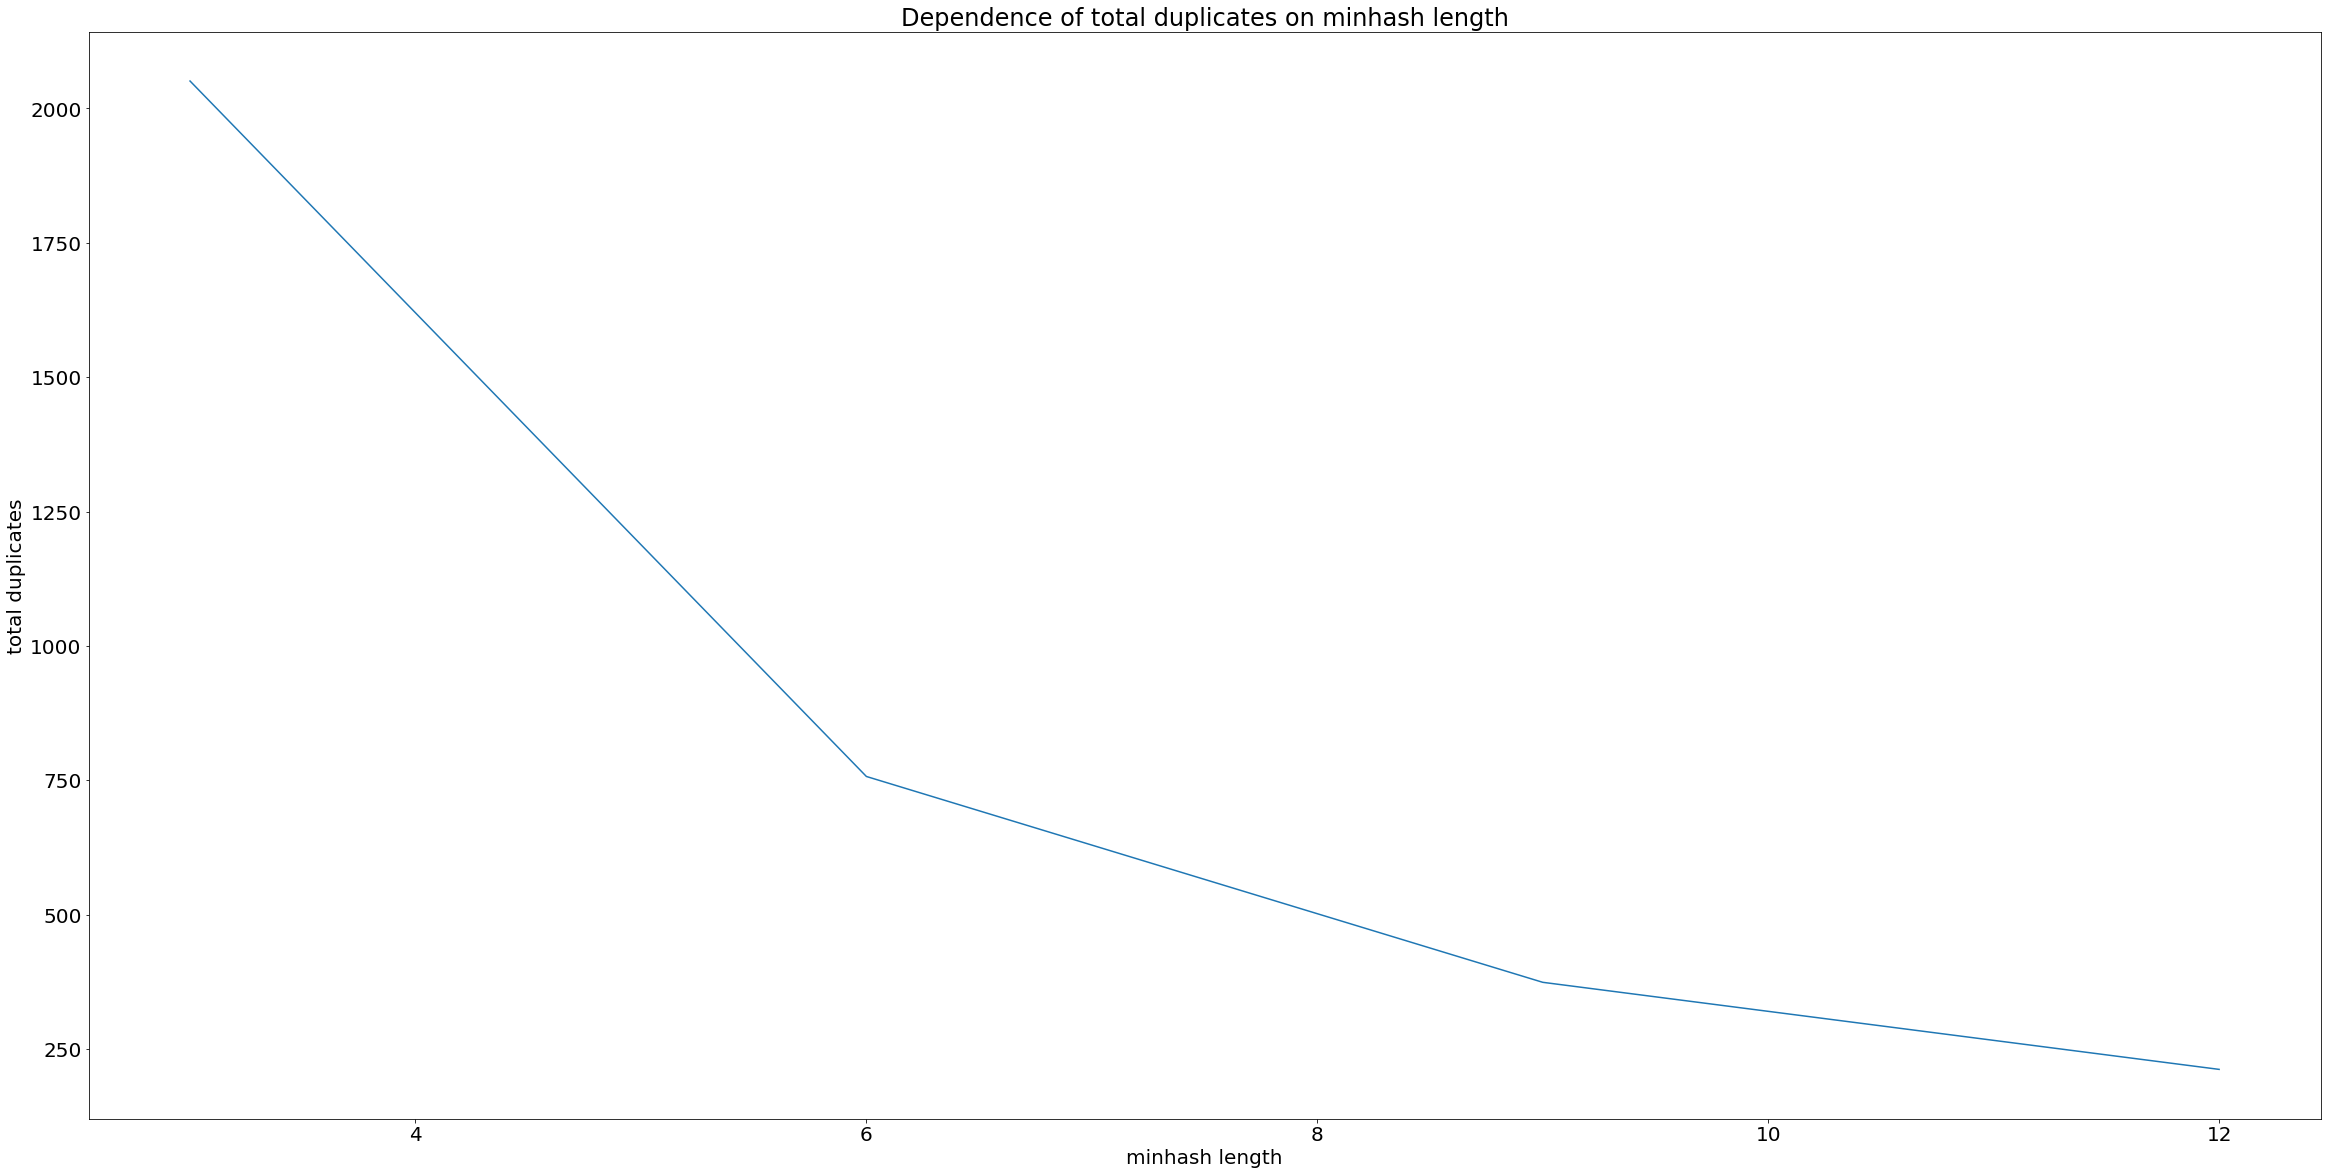

In [35]:
minhash_length_range = range(3, 13, 3)

plot_line(x=minhash_length_range, y=[score(3, mhl) for mhl in minhash_length_range],\
         xlabel='minhash length', ylabel='total duplicates', title='Dependence of total duplicates on minhash length')